# Supervized laerning
우리가 일반적으로 알고 있는 일차함수입니다. 먼 기억이지만 중학교 수학시간을 기억해보면 우리가 모르는 값은 x 입니다.

\begin{align}
  \mathbf{y} = \mathbf{a} \cdot \mathbf{x} + \mathbf{b}
\end{align}

하지만 머신러닝의 지도학습에서는 x와 y를 알고 있습니다. 이것을 우리는 데이터라고 부릅니다. a와 b를 추정해가는 과정을 모델을 학습시킨다 또는 훈련시킨다라고 표현합니다. 아래의 공식이 지도학습에 해당하는 대부분의 머신러닝 알고리즘의 시작점입니다. 그래서 Linear model이라고 부르기도 합니다.

\begin{align}
  \mathbf{y} = \mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}
\end{align}

다시 한번 강조하시만 우리가 모르는 값은 $\alpha$와 $\beta$입니다. 이 것의 실제값을 정확하게 추정해가는 과정이 머신러닝입니다. 그렇다면 이 일차함수처럼 보이는 머신러닝 공식을 그림을 표련해보겠습니다. 왜 모르는 값을 수학적으로 정확하게 계산하지 못하고 추정하는 지 알 수 있습니다.  

Mean Squared Error: 0.9309


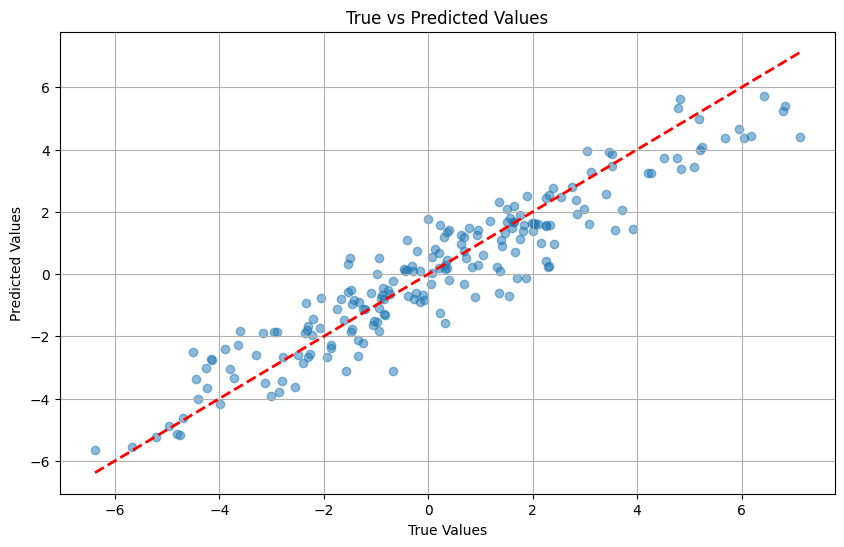

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Generate fake data
num_samples = 1000
num_features = 10

# Feature matrix (X)
X = np.random.randn(num_samples, num_features)

# Coefficients (alpha)
alpha = np.random.randn(num_features)

# Intercept (beta)
beta = np.random.randn(num_samples)

# Target vector (y)
y = X.dot(alpha) + beta

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()


## Regression
이번 주제에는 해당하지 않기 때문에 건너뛰고 가장 많이 활용되어 유용한 분류로 들어가 보겠습니다.

## Classification
클래스를 예측한다고 생각하면 편합니다. 다시 말해서 데이터의 기 정의된 클래스를 학습하여 앞으로 들어올 데이터의 클래스를 예측할 수 있는 모델이 분류모델(classification model)입니다.

기본이 되는 logistic regressio의 공식입니다.
$$
\mathbf{y} = \frac{1}{1 + e^{-(\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta})}}
$$

이 공식을 sigmoid라고 부릅니다. 아래와 같이 동작하는 것을 알 수 있습니다. y축을 보는 것이 좋은데요. 0과 1 사이의 값을 산출합니다. 그래서 확률을 계산하는 공식이라는 것을 알 수 있습니다.

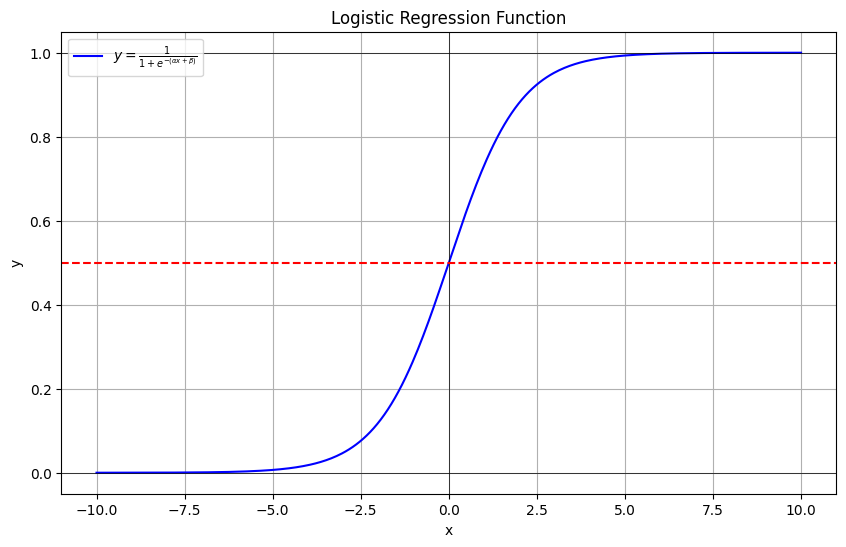

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression equation
def logistic_regression(x, alpha, beta):
    return sigmoid(alpha * x + beta)

# Generate a range of values for x
x = np.linspace(-10, 10, 400)

# Define the coefficients alpha and beta
alpha = 1
beta = 0

# Compute the logistic regression values
y = logistic_regression(x, alpha, beta)

# Plot the logistic regression function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$y = \frac{1}{1 + e^{-(\alpha x + \beta)}}$', color='blue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Function')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Sigmoid의 일반화된 버전도 있습니다. Hyperbolic Tangent입니다.

$$
\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
        = \frac{e^{\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}} - e^{-{\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}}}}{e^{\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}} + e^{-{\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}}}}
$$

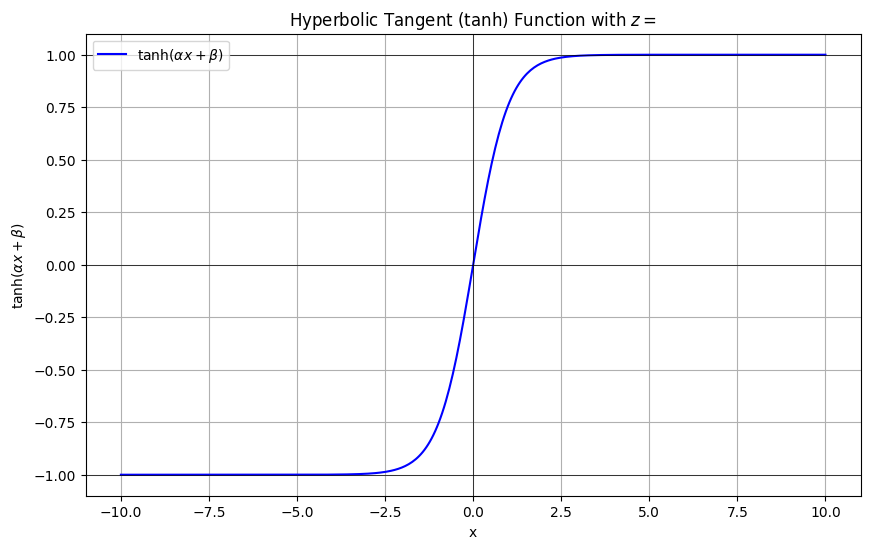

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperbolic tangent function
def tanh(z):
    return np.tanh(z)

# Define the logistic regression equation with z = αx + β
def tanh_regression(x, alpha, beta):
    return tanh(alpha * x + beta)

# Generate a range of values for x
x = np.linspace(-10, 10, 400)

# Define the coefficients α and β
alpha = 1
beta = 0

# Compute the tanh regression values
y = tanh_regression(x, alpha, beta)

# Plot the tanh regression function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$\tanh(\alpha x + \beta)$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5)
plt.axhline(-1, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel(r'$\tanh(\alpha x + \beta)$')
plt.title('Hyperbolic Tangent (tanh) Function with $z = \alpha x + \beta$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

아래의 그래프처럼 스케일링 변수를 활용하면 변화정도를 조절할 수 있습니다.

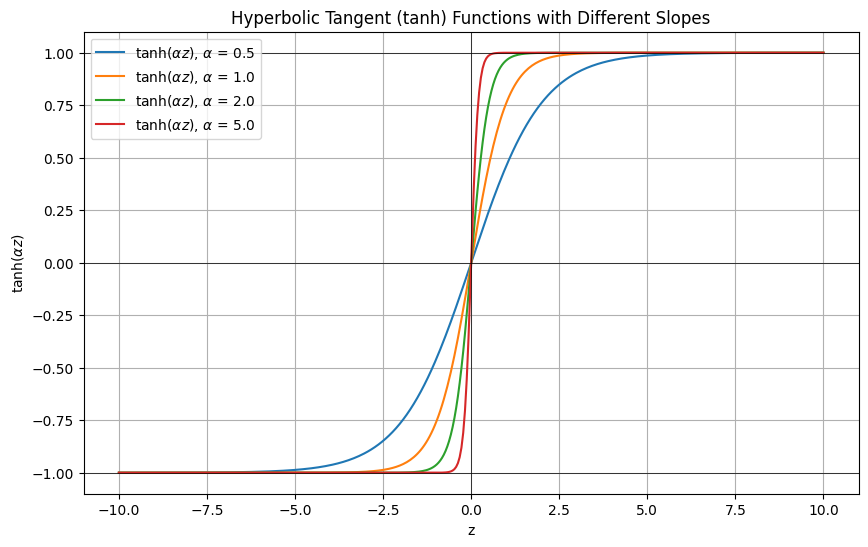

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperbolic tangent function
def tanh(z, alpha):
    return np.tanh(alpha * z)

# Generate a range of values for z
z = np.linspace(-10, 10, 400)

# Define different values of alpha
alphas = [0.5, 1.0, 2.0, 5.0]

# Plot multiple tanh functions with different slopes
plt.figure(figsize=(10, 6))
for alpha in alphas:
    plt.plot(z, tanh(z, alpha), label=r'$\tanh(\alpha z)$, $\alpha$ = {}'.format(alpha))

plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5)
plt.axhline(-1, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('z')
plt.ylabel(r'$\tanh(\alpha z)$')
plt.title('Hyperbolic Tangent (tanh) Functions with Different Slopes')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

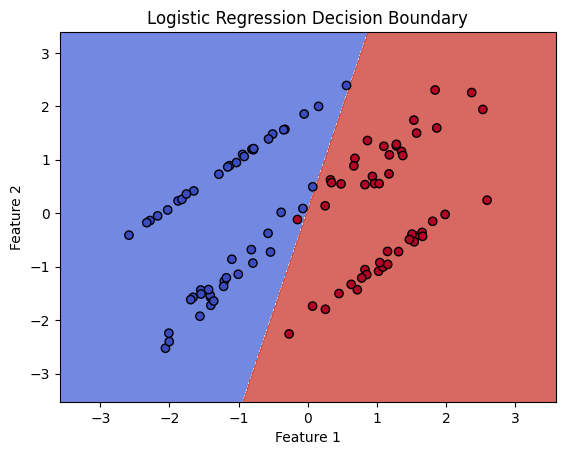

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities for the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


### 가상 데이터 생성
처음 시작은 가상 데이터를 생성하여 모델을 만들어보겠습니다. 가상 데이터를 만드는 과정은 생각보다 중요합니다. 공부를 시작하는 사람에게는 머신러닝의 이론에 집중할 수 있게 도와주고 시뮬레이션을 하는 사람에게는 예상되는 상황에 맞는 데이터를 생성해서 실험을 진행해 볼 수 있게 도와줍니다. 실례로 코로나바이러스가 우리를 위협하던 초기에 많은 사람들이 이 바이러스의 전파 패턴에 대해서 연구할 때 사용되었습니다.

In [3]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
# random seed가 같으면 같은 무작위성으로 숫자를 출력합니다.
# 따라서 42를 고정하면 같은 결과가 보여집니다
np.random.seed(42)

# Define the number of samples and features
# 데이터의 갯수(행의 수)와 피쳐(열의 수)를 설정합니다.
# 그래서 현재 생성할 가상 데이터는 1,000개의 행과 10개의 연속될 숫자형태의 피쳐를 가질 예정입니다.
# 이 피쳐는 y값을 예측할 때 사용되기 떄문에 X라고 통칭합니다.
num_samples = 1000
num_features = 10

# Generate random feature data
# 이제 X를 생성해보겠습니다.
X = np.random.randn(num_samples, num_features)

# Generate a binary target variable with some random noise
# Assume that the first half of the features contribute positively to the target,
# and the second half contribute negatively
# 알파를 coefficient라고 부릅니다. 알파를 만들어서 linear combination을 만듭니다.
coefficients = np.array([1]*5 + [-1]*5)
linear_combination = X @ coefficients

# Apply a logistic function to get probabilities
# 위에서 만든 linear combination을 sigmoid에 넣어서 확율을 계산합니다.
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target variable based on probabilities
# 계산한 확률에 따라서 class(label)을 부여합니다.
y = np.random.binomial(1, probabilities)

# Create a DataFrame with the numerical features
#
feature_columns = [f'feature_{i+1}' for i in range(num_features)]
df = pd.DataFrame(X, columns=feature_columns)
df['target'] = y

# Generate nominal categorical data
nominal_categories = ['apple', 'banana', 'cherry', 'date']
df['fruit'] = np.random.choice(nominal_categories, num_samples)

# Generate ordinal categorical data
ordinal_categories = ['High School', 'Bachelor', 'Master', 'PhD']
df['education_level'] = np.random.choice(ordinal_categories, num_samples)

# Display the first few rows of the DataFrame
print(df.head())

# Optionally save to CSV
df.to_csv('enhanced_binary_classification_data.csv', index=False)

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target   fruit education_level  
0   1.579213   0.767435  -0.469474    0.542560       1   apple             PhD  
1  -1.012831   0.314247  -0.908024   -1.412304       0   apple             PhD  
2  -1.150994   0.375698  -0.600639   -0.291694       1    date     High School  
3   0.208864  -1.959670  -1.328186    0.196861       1   apple             PhD  
4  -0.460639   1.057122   0.343618   -1.763040       1  banana          Master  


In [8]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.76743473,
        -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, ...,  0.31424733,
        -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , ...,  0.37569802,
        -0.60063869, -0.29169375],
       ...,
       [-0.9125882 ,  0.70138989,  0.8452733 , ..., -0.90092112,
        -1.01268556, -1.75995888],
       [-0.44579531, -0.50372234,  0.52593728, ..., -1.77598225,
        -0.98094673, -0.77081363],
       [ 1.43362502,  0.19145072,  0.66216875, ..., -0.70531672,
         0.49576557,  0.64438845]])

In [9]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [4]:
coefficients

array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1])

In [7]:
linear_combination

array([ 1.09418626e-01, -7.44184158e-01,  8.94975171e-01,  5.10488332e+00,
        5.57343512e-01, -1.84903279e-01, -4.15912807e+00,  2.09437060e+00,
       -4.37332506e-01,  7.79712222e-01, -5.79021261e+00, -6.07087115e-01,
        2.39647552e-01, -3.01750847e+00,  1.32829432e+00, -6.48263617e-01,
       -1.01881747e+00, -5.91381520e+00,  2.03858660e-01,  9.80996263e-01,
       -2.78101954e+00,  3.65074393e+00, -9.90774050e-01,  2.03812992e+00,
       -1.44447129e+00, -1.23160795e-03, -4.14986180e+00,  4.51864519e-01,
        5.11414605e+00, -2.04035112e+00, -1.20073939e+00,  3.23878709e+00,
       -1.02774808e+00,  9.08994954e-01,  2.24384146e+00,  4.27918219e+00,
        3.87505027e+00,  3.41628563e+00, -7.58973868e+00,  9.89331520e-01,
       -2.63922834e+00, -2.50230629e+00,  4.79462696e+00,  1.64323053e-01,
       -1.63297151e+00,  3.56719879e+00,  1.35752962e+00, -5.91754874e+00,
       -2.66119826e+00,  5.15827245e+00,  4.07529185e+00, -2.63253692e+00,
        2.04760438e+00, -

In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.010788,0.031292,-0.022542,-0.043075,0.013622,-0.029252,-0.002689,0.005495,-0.023104,0.038105,0.504000
std,1.005433,1.016046,0.983366,0.983406,1.012645,1.037024,1.031230,1.030962,0.986846,0.945284,0.500234
min,-3.922400,-3.688365,-3.241267,-2.943142,-3.138515,-3.170426,-2.801912,-3.601085,-3.007632,-3.176704,0.000000
25%,-0.616527,-0.631506,-0.702626,-0.750008,-0.651541,-0.749592,-0.744779,-0.713176,-0.650034,-0.559290,0.000000
50%,0.014006,0.007605,-0.015036,-0.001346,-0.012020,-0.012086,-0.024976,-0.013284,-0.003221,0.019097,1.000000
75%,0.679698,0.685621,0.613766,0.638310,0.721896,0.680087,0.683319,0.696602,0.608861,0.687027,1.000000
max,3.076860,3.529055,3.152057,3.117681,2.935658,3.926238,3.243093,3.137749,3.377383,3.852731,1.000000


<Axes: >

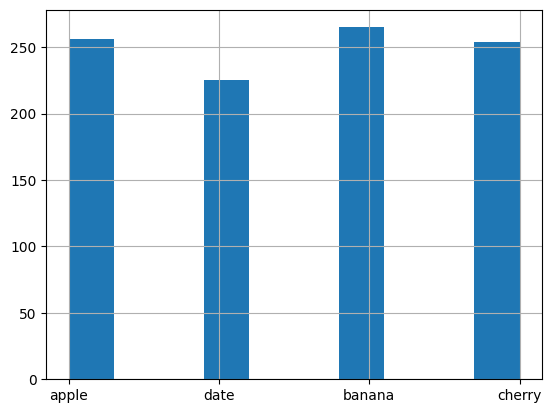

In [ ]:
df['fruit'].hist()

<Axes: >

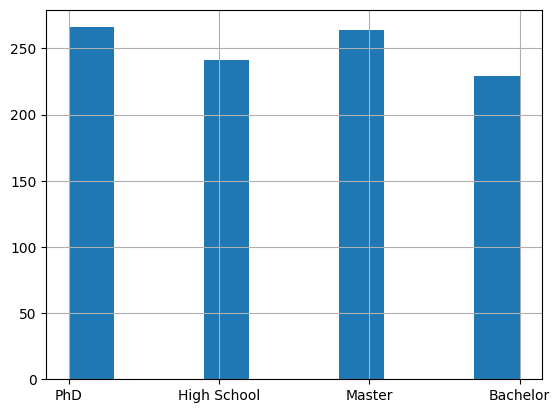

In [ ]:
df['education_level'].hist()

<Axes: >

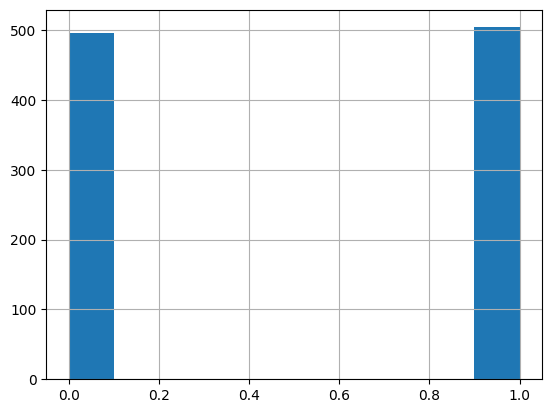

In [ ]:
df['target'].hist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# One-hot encode the nominal categorical feature
one_hot = pd.get_dummies(df['fruit'], prefix='fruit')

# Ordinal encode the ordinal categorical feature
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_levels])
df['education_level_encoded'] = ordinal_encoder.fit_transform(df[['education_level']])

# Combine the original DataFrame with the encoded features
df = pd.concat([df, one_hot], axis=1)

# Drop the original categorical columns
df.drop(['fruit', 'education_level'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target  \
0   1.579213   0.767435  -0.469474    0.542560       1   
1  -1.012831   0.314247  -0.908024   -1.412304       0   
2  -1.150994   0.375698  -0.600639   -0.291694       1   
3   0.208864  -1.959670  -1.328186    0.196861       1   
4  -0.460639   1.057122   0.343618   -1.763040       1   

   education_level_encoded  fruit_apple  fruit_banana  fruit_cherry  \
0                      3.0         True         False         False   
1                      3.0         True         False         False   
2          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('enhanced_binary_classification_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Define feature columns
numerical_features = [f'feature_{i+1}' for i in range(10)]
nominal_features = ['fruit']
ordinal_features = ['education_level']

# Define the target
target = 'target'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('nom', OneHotEncoder(), nominal_features),
        ('ord', OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']]), ordinal_features)
    ])

# Split the data into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = pipeline.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = pipeline.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target   fruit education_level  
0   1.579213   0.767435  -0.469474    0.542560       1   apple             PhD  
1  -1.012831   0.314247  -0.908024   -1.412304       0   apple             PhD  
2  -1.150994   0.375698  -0.600639   -0.291694       1    date     High School  
3   0.208864  -1.959670  -1.328186    0.196861       1   apple             PhD  
4  -0.460639   1.057122   0.343618   -1.763040       1  banana          Master  
Validation Accuracy: 0.7533
              precision    recall  f1-score   support

    

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Grid Search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found by Grid Search: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# Validate the best model
best_grid_model = grid_search.best_estimator_
y_val_pred = best_grid_model.predict(X_val)
print(f'Validation Accuracy with Grid Search: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the best model
y_test_pred = best_grid_model.predict(X_test)
print(f'Test Accuracy with Grid Search: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by Grid Search: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best cross-validation accuracy: 0.8157
Validation Accuracy with Grid Search: 0.7733
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        74
           1       0.78      0.78      0.78        76

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150

Test Accuracy with Grid Search: 0.8267
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        75
           1       0.80      0.88      0.84        75

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Search
param_dist = {
    'classifier__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'classifier__max_depth': [None] + [int(x) for x in np.linspace(10, 100, num=10)],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create a Random Search object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=3, random_state=42)

# Fit the Random Search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found by Random Search: {random_search.best_params_}')
print(f'Best cross-validation accuracy: {random_search.best_score_:.4f}')

# Validate the best model
best_random_model = random_search.best_estimator_
y_val_pred = best_random_model.predict(X_val)
print(f'Validation Accuracy with Random Search: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the best model
y_test_pred = best_random_model.predict(X_test)
print(f'Test Accuracy with Random Search: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by Random Search: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 50, 'classifier__bootstrap': True}
Best cross-validation accuracy: 0.8229
Validation Accuracy with Random Search: 0.7867
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        74
           1       0.80      0.78      0.79        76

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150

Test Accuracy with Random Search: 0.8333
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        75
           1       0.81      0.87      0.84        75

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weight